/tmp/ipykernel_1036466/2965316114.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


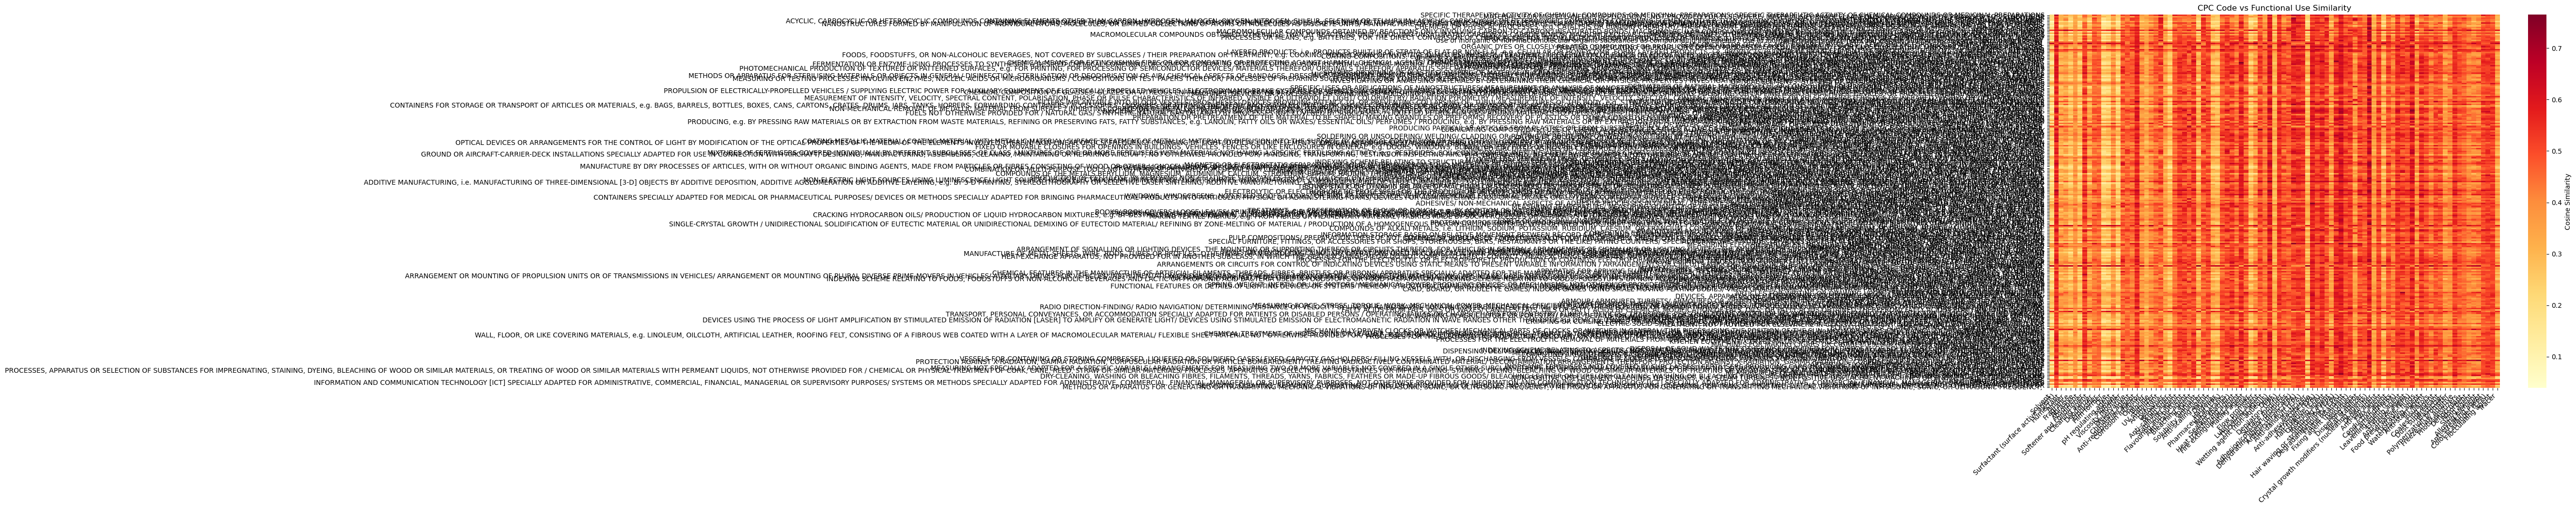


Top 5 most similar pairs:
CPC: SINGLE-CRYSTAL GROWTH / UNIDIRECTIONAL SOLIDIFICATION OF EUTECTIC MATERIAL OR UNIDIRECTIONAL DEMIXING OF EUTECTOID MATERIAL/ REFINING BY ZONE-MELTING OF MATERIAL / PRODUCTION OF A HOMOGENEOUS POLYCRYSTALLINE MATERIAL WITH DEFINED STRUCTURE / SINGLE CRYSTALS OR HOMOGENEOUS POLYCRYSTALLINE MATERIAL WITH DEFINED STRUCTURE/ SINGLE-CRYSTAL GROWTH  - Function: Crystal growth modifiers (nucleating agents) - Similarity: 0.748
CPC: TREATMENT OR CHEMICAL MODIFICATION OF RUBBERS/ TREATMENT OR CHEMICAL MODIFICATION OF RUBBERS - Function: Wetting agent (non-aqueous) - Similarity: 0.750
CPC: ADHESIVES/ NON-MECHANICAL ASPECTS OF ADHESIVE PROCESSES IN GENERAL/ ADHESIVE PROCESSES NOT PROVIDED FOR ELSEWHERE/ USE OF MATERIALS AS ADHESIVES / ADHESIVES - Function: Anti-adhesive/cohesive - Similarity: 0.750
CPC: RESISTORS/ RESISTORS - Function: Insulators - Similarity: 0.757
CPC: CHEMICAL MEANS FOR EXTINGUISHING FIRES OR FOR COMBATING OR PROTECTING AGAINST HARMFUL CHEMICAL AG

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

def create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_labels, func_labels):
    # Calculate cosine similarity between the two sets of embeddings
    similarity_matrix = cosine_similarity(cpc_embeddings, func_embeddings)
    
    # Create heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(similarity_matrix, 
                xticklabels=func_labels,
                yticklabels=cpc_labels,
                cmap='YlOrRd',  # You can change the colormap
                cbar_kws={'label': 'Cosine Similarity'})
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title('CPC Code vs Functional Use Similarity')
    plt.tight_layout()
    
    return similarity_matrix

# Load your embeddings (adjust based on how you saved them)
cpc_data = np.load('CPCEmbeddings.npz')
func_data = np.load('FunctionEmbeddings.npz')

# Extract embeddings and labels
cpc_embeddings = cpc_data['embeddings']
cpc_labels = cpc_data['labels']
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Create and display heatmap
similarity_matrix = create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_labels, func_labels)
plt.show()

# Optionally, find the highest similarity pairs
def print_top_similarities(similarity_matrix, cpc_labels, func_labels, top_n=5):
    # Get indices of top similarities
    flat_indices = np.argsort(similarity_matrix.flatten())[-top_n:]
    row_indices, col_indices = np.unravel_index(flat_indices, similarity_matrix.shape)
    
    print(f"\nTop {top_n} most similar pairs:")
    for i, j in zip(row_indices, col_indices):
        print(f"CPC: {cpc_labels[i]} - Function: {func_labels[j]} - Similarity: {similarity_matrix[i, j]:.3f}")

print_top_similarities(similarity_matrix, cpc_labels, func_labels)

In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

def create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_data, func_labels):
    # Calculate cosine similarity between the two sets of embeddings
    similarity_matrix = cosine_similarity(cpc_embeddings, func_embeddings)
    
    # Get CPC labels from the code field
    cpc_labels = cpc_data['code']
    
    # Create heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(similarity_matrix, 
                xticklabels=func_labels,
                yticklabels=cpc_labels,
                cmap='YlOrRd',
                cbar_kws={'label': 'Cosine Similarity'})
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title('CPC Code vs Functional Use Similarity')
    plt.tight_layout()
    
    return similarity_matrix

# Load your embeddings
cpc_data = np.load('CPCEmbeddings.npz')
func_data = np.load('FunctionEmbeddings.npz')

# Extract embeddings
cpc_embeddings = cpc_data['embeddings']
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Create and display heatmap
similarity_matrix = create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_data, func_labels)
plt.show()

# Print top similarities
def print_top_similarities(similarity_matrix, cpc_data, func_labels, top_n=5):
    # Get indices of top similarities
    flat_indices = np.argsort(similarity_matrix.flatten())[-top_n:]
    row_indices, col_indices = np.unravel_index(flat_indices, similarity_matrix.shape)
    
    print(f"\nTop {top_n} most similar pairs:")
    for i, j in zip(row_indices, col_indices):
        print(f"CPC: {cpc_data['code'][i]} - Function: {func_labels[j]} - Similarity: {similarity_matrix[i, j]:.3f}")

print_top_similarities(similarity_matrix, cpc_data, func_labels)

KeyError: 'code is not a file in the archive'

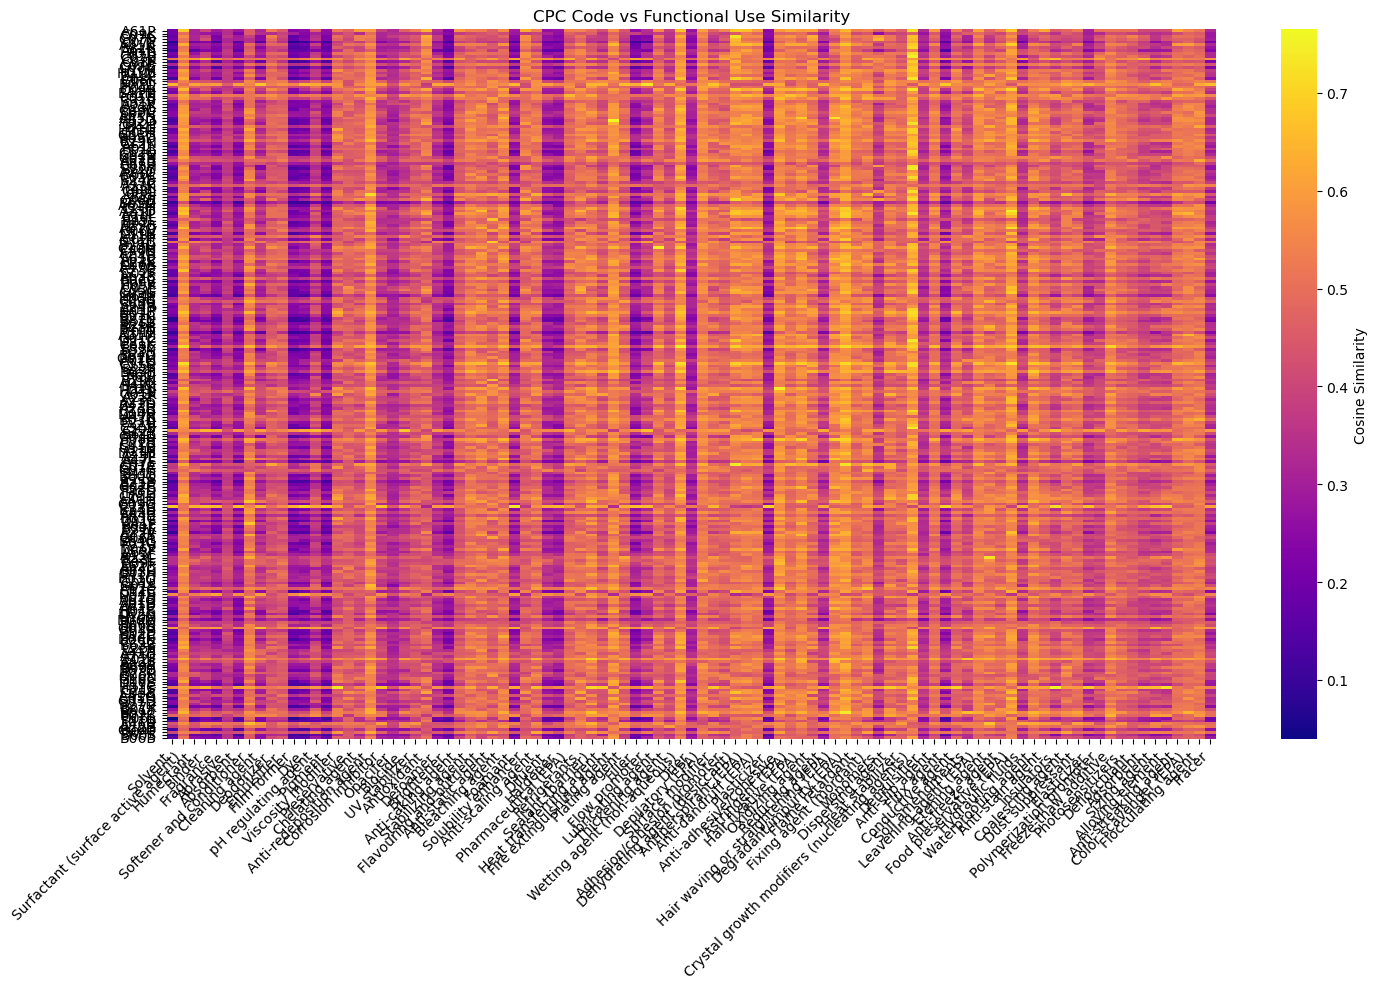


Top 5 most similar pairs:
CPC: C30B - Function: Crystal growth modifiers (nucleating agents) - Similarity: 0.748
CPC: C08C - Function: Wetting agent (non-aqueous) - Similarity: 0.750
CPC: C09J - Function: Anti-adhesive/cohesive - Similarity: 0.750
CPC: H01C - Function: Insulators - Similarity: 0.757
CPC: A62D - Function: Fire extinguishing agent - Similarity: 0.765


In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_df, func_labels):
    # Calculate cosine similarity between the two sets of embeddings
    similarity_matrix = cosine_similarity(cpc_embeddings, func_embeddings)
    
    # Create heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(similarity_matrix, 
                xticklabels=func_labels,
                yticklabels=cpc_df['code'],  # Using code from DataFrame
                cmap='plasma',
                cbar_kws={'label': 'Cosine Similarity'})
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.title('CPC Code vs Functional Use Similarity')
    plt.tight_layout()
    
    return similarity_matrix

# Load your data
cpc_df = pd.read_pickle('CPCEmbeddings.pkl')  # Load pickle file
func_data = np.load('FunctionEmbeddings.npz')

# Extract embeddings
cpc_embeddings = np.stack(cpc_df['embedding'].values)  # Convert series of embeddings to array
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Create and display heatmap
similarity_matrix = create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_df, func_labels)
plt.show()

# Print top similarities
def print_top_similarities(similarity_matrix, cpc_df, func_labels, top_n=5):
    # Get indices of top similarities
    flat_indices = np.argsort(similarity_matrix.flatten())[-top_n:]
    row_indices, col_indices = np.unravel_index(flat_indices, similarity_matrix.shape)
    
    print(f"\nTop {top_n} most similar pairs:")
    for i, j in zip(row_indices, col_indices):
        print(f"CPC: {cpc_df['code'].iloc[i]} - Function: {func_labels[j]} - Similarity: {similarity_matrix[i, j]:.3f}")

print_top_similarities(similarity_matrix, cpc_df, func_labels)

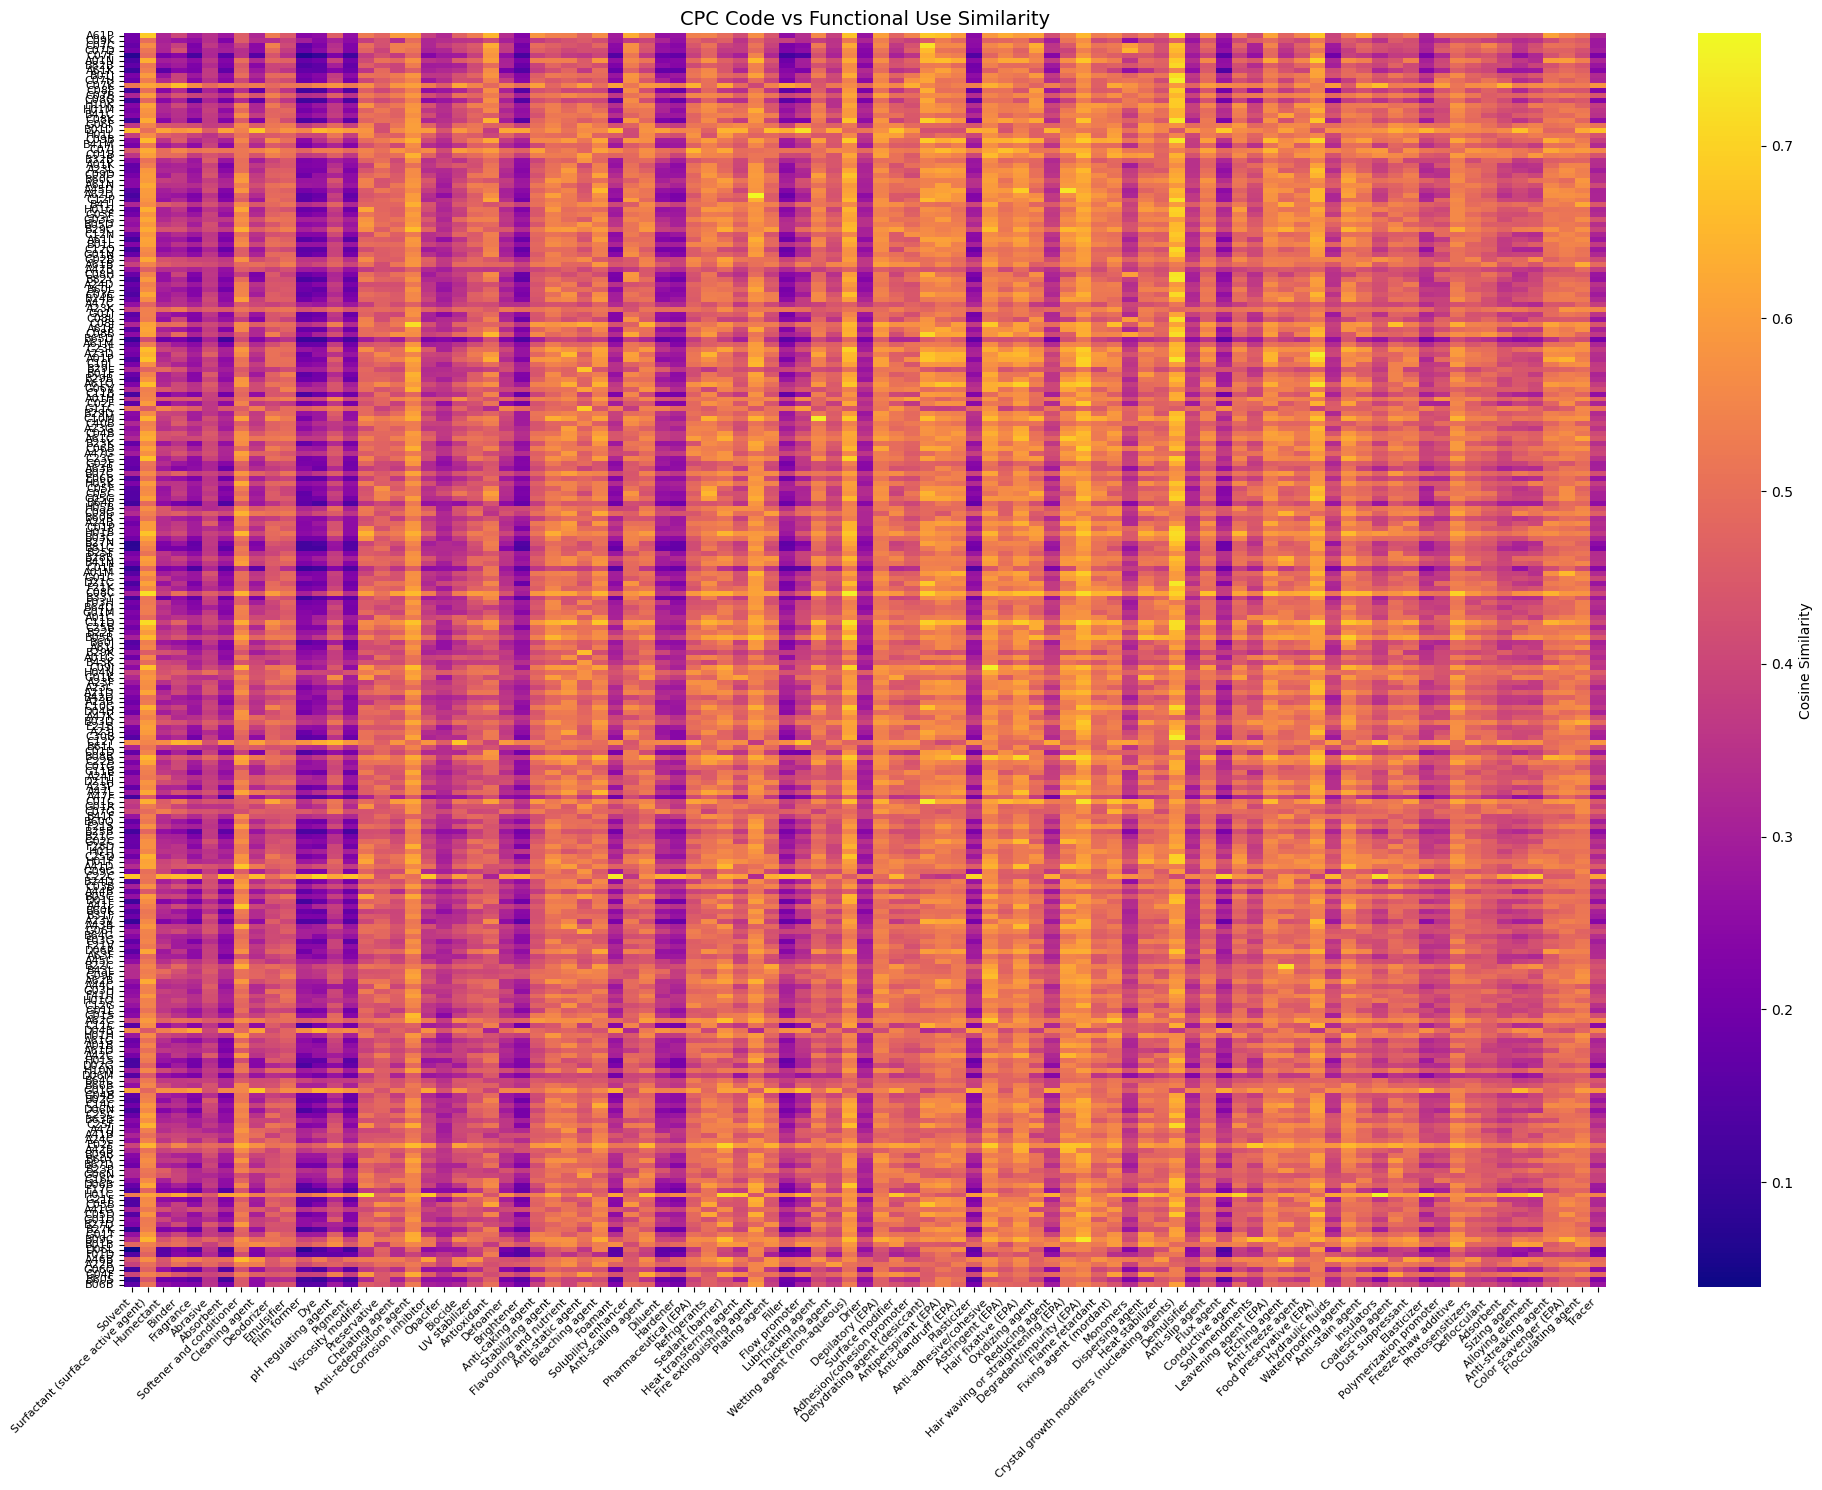


Top 5 most similar pairs:
CPC: C30B - Function: Crystal growth modifiers (nucleating agents) - Similarity: 0.748
CPC: C08C - Function: Wetting agent (non-aqueous) - Similarity: 0.750
CPC: C09J - Function: Anti-adhesive/cohesive - Similarity: 0.750
CPC: H01C - Function: Insulators - Similarity: 0.757
CPC: A62D - Function: Fire extinguishing agent - Similarity: 0.765


In [6]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_df, func_labels):
    # Calculate cosine similarity between the two sets of embeddings
    similarity_matrix = cosine_similarity(cpc_embeddings, func_embeddings)
    
    # Create larger figure
    plt.figure(figsize=(20, 15))
    
    # Create heatmap with smaller font sizes
    sns.heatmap(similarity_matrix, 
                xticklabels=func_labels,
                yticklabels=cpc_df['code'],
                cmap='plasma',
                cbar_kws={'label': 'Cosine Similarity'},
                fmt='.2f')
    
    # Adjust font sizes and rotation
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Smaller x-axis font
    plt.yticks(rotation=0, fontsize=8)  # Smaller y-axis font
    
    # Adjust title size
    plt.title('CPC Code vs Functional Use Similarity', fontsize=14)
    
    # Add more space for labels
    plt.tight_layout()
    
    return similarity_matrix

# Load your data
cpc_df = pd.read_pickle('CPCEmbeddings.pkl')
func_data = np.load('FunctionEmbeddings.npz')

# Extract embeddings
cpc_embeddings = np.stack(cpc_df['embedding'].values)
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Create and display heatmap
similarity_matrix = create_similarity_heatmap(cpc_embeddings, func_embeddings, cpc_df, func_labels)
plt.show()

# Print top similarities
def print_top_similarities(similarity_matrix, cpc_df, func_labels, top_n=5):
    flat_indices = np.argsort(similarity_matrix.flatten())[-top_n:]
    row_indices, col_indices = np.unravel_index(flat_indices, similarity_matrix.shape)
    
    print(f"\nTop {top_n} most similar pairs:")
    for i, j in zip(row_indices, col_indices):
        print(f"CPC: {cpc_df['code'].iloc[i]} - Function: {func_labels[j]} - Similarity: {similarity_matrix[i, j]:.3f}")

print_top_similarities(similarity_matrix, cpc_df, func_labels)

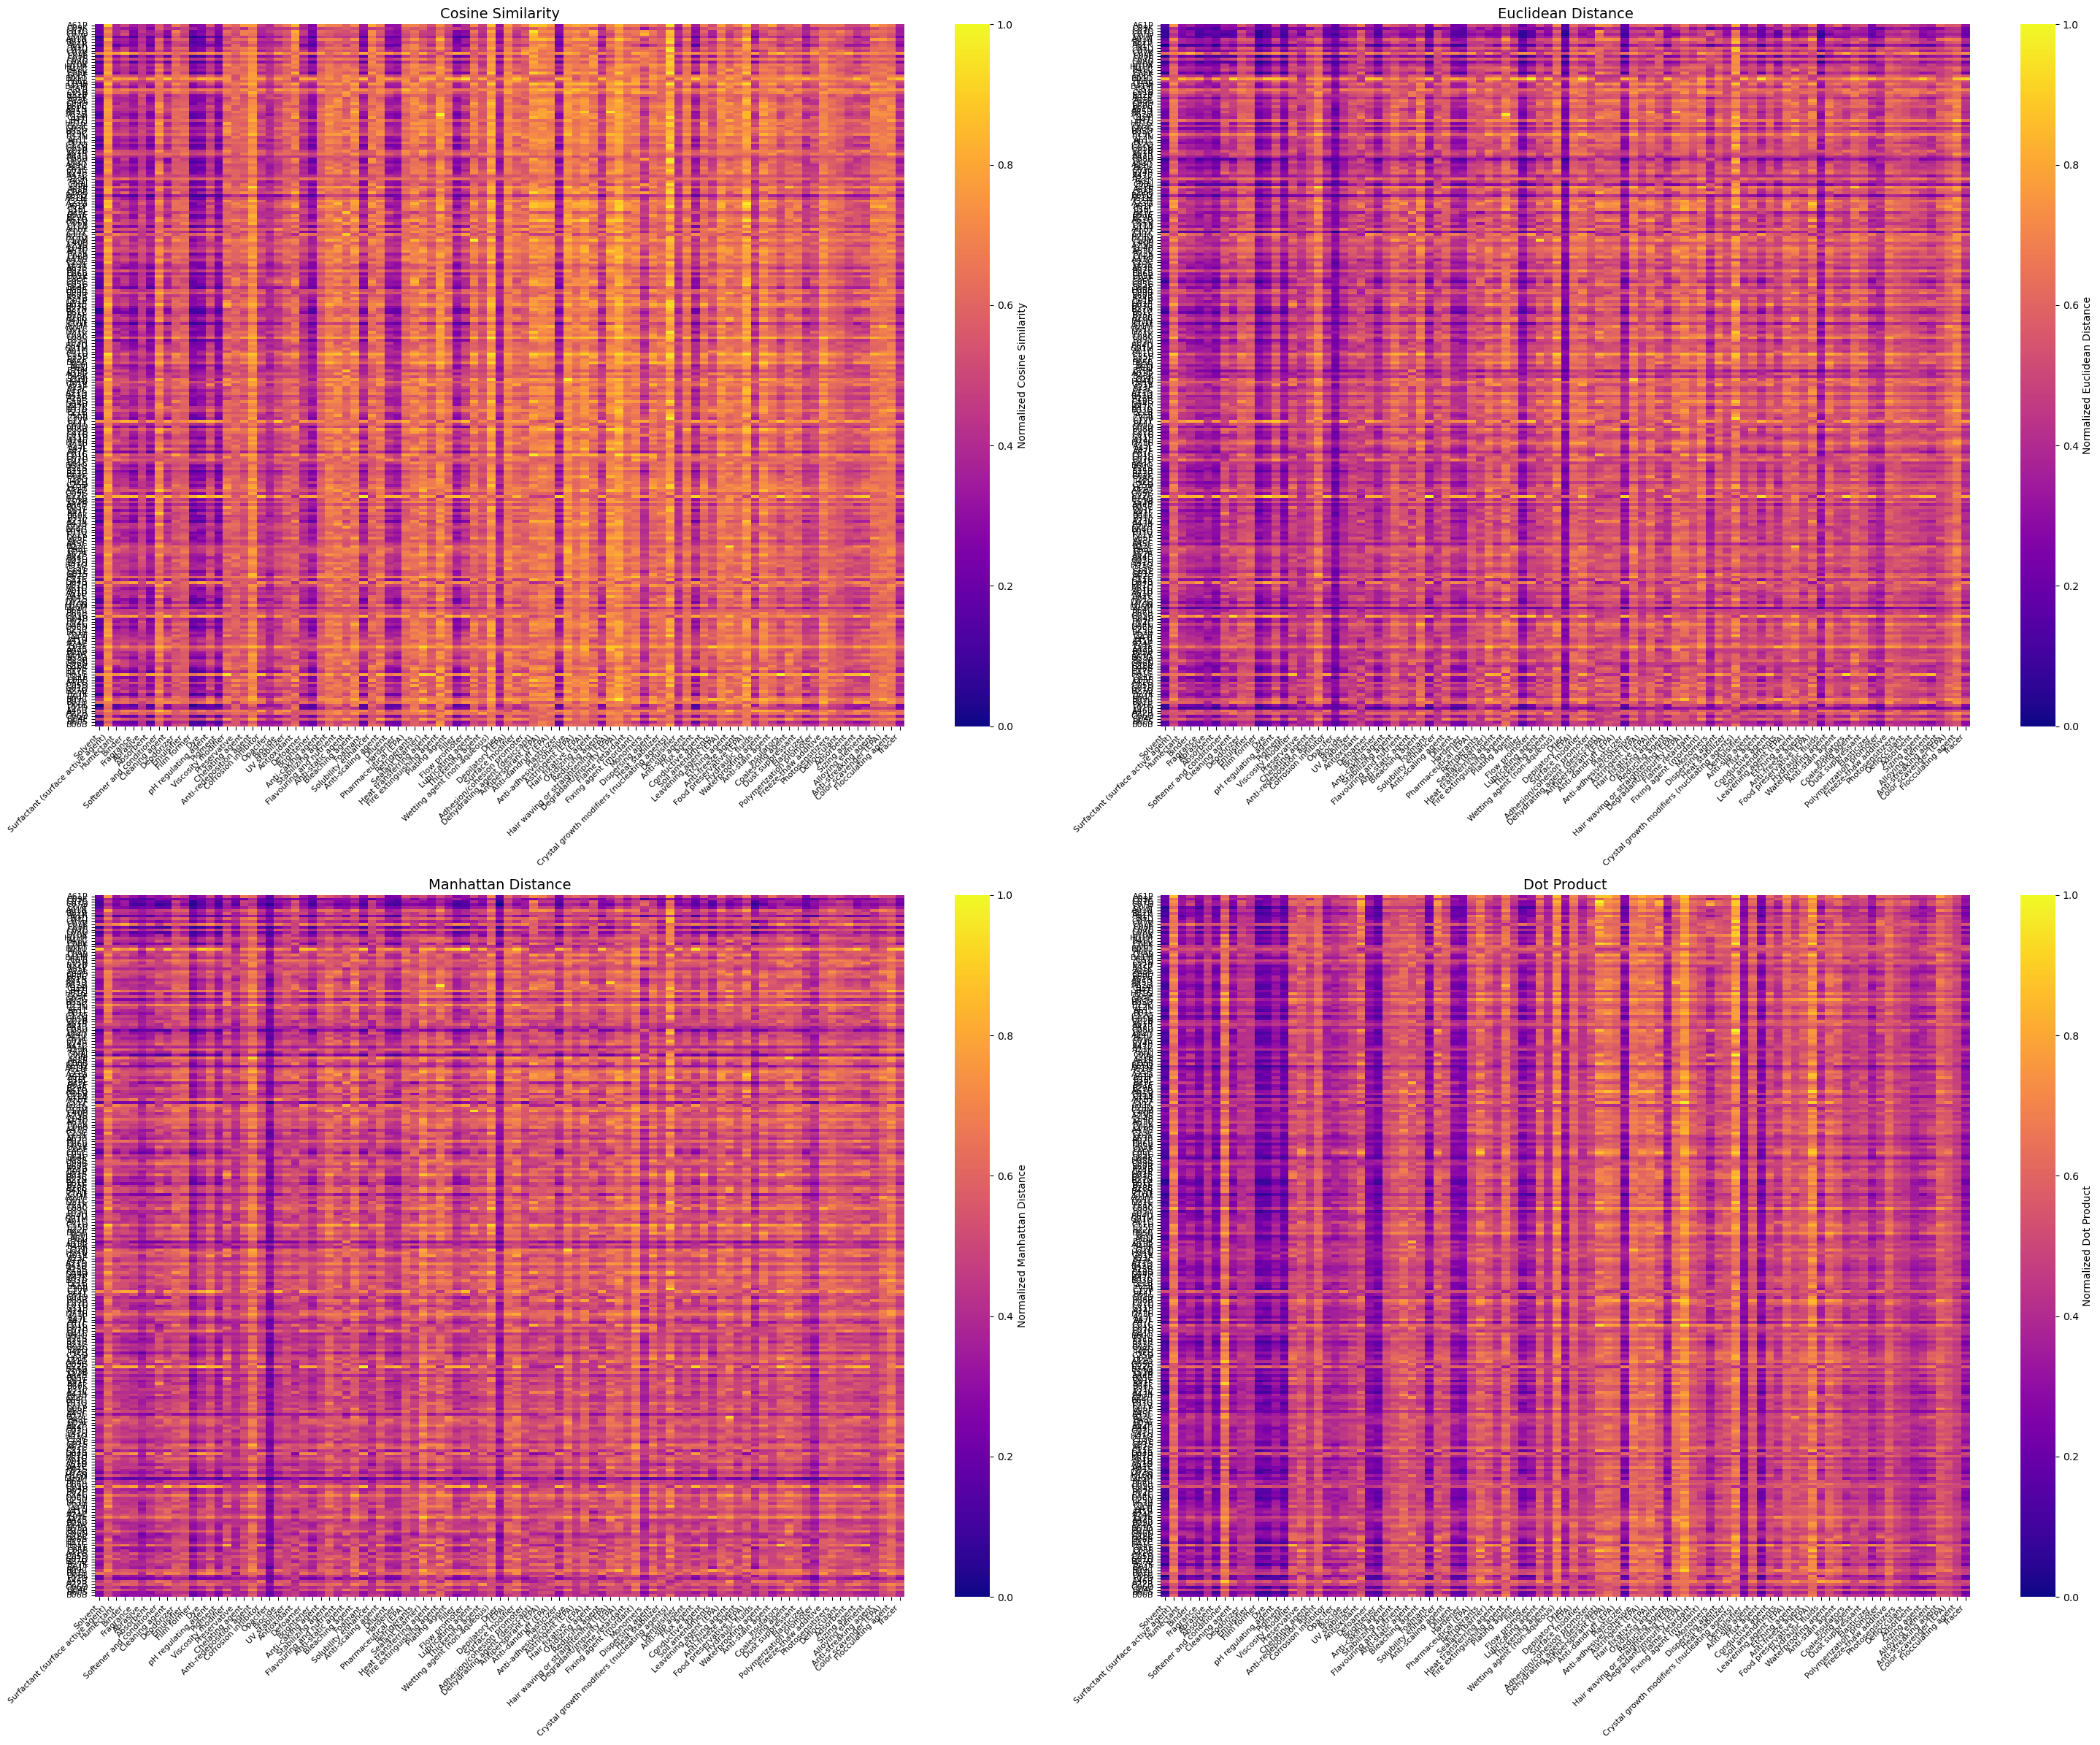


Top 3 most similar pairs for Cosine Similarity:
CPC: C09J - Function: Anti-adhesive/cohesive - Similarity: 0.750
CPC: H01C - Function: Insulators - Similarity: 0.757
CPC: A62D - Function: Fire extinguishing agent - Similarity: 0.765

Top 3 most similar pairs for Euclidean Distance:
CPC: A62D - Function: Fire extinguishing agent - Similarity: -6.511
CPC: C22C - Function: Foamant - Similarity: -6.478
CPC: B01D - Function: Flow promoter - Similarity: -6.329

Top 3 most similar pairs for Manhattan Distance:
CPC: C22C - Function: Foamant - Similarity: -142.840
CPC: A62D - Function: Fire extinguishing agent - Similarity: -141.527
CPC: B01D - Function: Flow promoter - Similarity: -137.658

Top 3 most similar pairs for Dot Product:
CPC: C08L - Function: Crystal growth modifiers (nucleating agents) - Similarity: 81.563
CPC: C07C - Function: Dehydrating agent (desiccant) - Similarity: 81.633
CPC: C08H - Function: Crystal growth modifiers (nucleating agents) - Similarity: 82.060


In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_similarity_heatmaps(cpc_embeddings, func_embeddings, cpc_df, func_labels):
    # Calculate different similarity metrics
    similarities = {
        'Cosine Similarity': cosine_similarity(cpc_embeddings, func_embeddings),
        'Euclidean Distance': -euclidean_distances(cpc_embeddings, func_embeddings),
        'Manhattan Distance': -manhattan_distances(cpc_embeddings, func_embeddings),
        'Dot Product': np.dot(cpc_embeddings, func_embeddings.T)
    }
    
    # Create subplots for each metric
    fig, axes = plt.subplots(2, 2, figsize=(30, 24))
    axes = axes.ravel()
    
    for idx, (metric_name, similarity_matrix) in enumerate(similarities.items()):
        # Normalize matrix to [0,1] range for better comparison
        normalized_matrix = (similarity_matrix - similarity_matrix.min()) / (similarity_matrix.max() - similarity_matrix.min())
        
        sns.heatmap(normalized_matrix, 
                    xticklabels=func_labels,
                    yticklabels=cpc_df['code'],
                    cmap='plasma',
                    cbar_kws={'label': f'Normalized {metric_name}'},
                    ax=axes[idx])
        
        axes[idx].set_title(metric_name, fontsize=14)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right', fontsize=8)
        axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation=0, fontsize=8)
    
    plt.tight_layout()
    return similarities

# Load and prepare data
cpc_df = pd.read_pickle('CPCEmbeddings.pkl')
func_data = np.load('FunctionEmbeddings.npz')

cpc_embeddings = np.stack(cpc_df['embedding'].values)
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Create heatmaps and store similarity matrices
similarity_matrices = create_similarity_heatmaps(cpc_embeddings, func_embeddings, cpc_df, func_labels)
plt.show()

# Compare top similarities across metrics
def print_top_similarities_all_metrics(similarity_matrices, cpc_df, func_labels, top_n=3):
    for metric_name, similarity_matrix in similarity_matrices.items():
        print(f"\nTop {top_n} most similar pairs for {metric_name}:")
        flat_indices = np.argsort(similarity_matrix.flatten())[-top_n:]
        row_indices, col_indices = np.unravel_index(flat_indices, similarity_matrix.shape)
        
        for i, j in zip(row_indices, col_indices):
            print(f"CPC: {cpc_df['code'].iloc[i]} - Function: {func_labels[j]} - Similarity: {similarity_matrix[i, j]:.3f}")

print_top_similarities_all_metrics(similarity_matrices, cpc_df, func_labels)

In [9]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import pandas as pd

# Calculate all similarity metrics and their average
def calculate_average_similarity(cpc_embeddings, func_embeddings):
    # Calculate different similarities
    cosine_sim = cosine_similarity(cpc_embeddings, func_embeddings)
    
    # For distances, we'll normalize and convert to similarities
    euclidean_sim = -euclidean_distances(cpc_embeddings, func_embeddings)
    manhattan_sim = -manhattan_distances(cpc_embeddings, func_embeddings)
    dot_sim = np.dot(cpc_embeddings, func_embeddings.T)
    
    # Normalize each matrix to [0,1] range
    def normalize_matrix(matrix):
        return (matrix - matrix.min()) / (matrix.max() - matrix.min())
    
    normalized_matrices = [
        normalize_matrix(cosine_sim),
        normalize_matrix(euclidean_sim),
        normalize_matrix(manhattan_sim),
        normalize_matrix(dot_sim)
    ]
    
    # Calculate average similarity
    average_similarity = sum(normalized_matrices) / len(normalized_matrices)
    
    return average_similarity

# Load data
cpc_df = pd.read_pickle('CPCEmbeddings.pkl')
func_data = np.load('FunctionEmbeddings.npz')

cpc_embeddings = np.stack(cpc_df['embedding'].values)
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Calculate average similarity
average_similarity = calculate_average_similarity(cpc_embeddings, func_embeddings)

# Create mapping DataFrame
mappings = []
for i, func in enumerate(func_labels):
    # Get the most similar CPC code for this function
    most_similar_idx = np.argmax(average_similarity[:, i])
    similarity_score = average_similarity[most_similar_idx, i]
    
    mapping = {
        'Functional_Use': func,
        'Most_Similar_CPC': cpc_df['code'].iloc[most_similar_idx],
        'Similarity_Score': similarity_score,
        'CPC_Description': cpc_df['text'].iloc[most_similar_idx] if 'text' in cpc_df.columns else 'N/A'
    }
    mappings.append(mapping)

# Create final DataFrame
result_df = pd.DataFrame(mappings)

# Sort by similarity score
result_df = result_df.sort_values('Similarity_Score', ascending=False)

# Save to CSV
result_df.to_csv('functional_cpc_mappings.csv', index=False)

# Display first few rows
print("\nFirst few function-CPC mappings:")
print(result_df.head())

# Display some summary statistics
print("\nSummary Statistics for Similarity Scores:")
print(result_df['Similarity_Score'].describe())


First few function-CPC mappings:
                 Functional_Use Most_Similar_CPC  Similarity_Score  \
40     Fire extinguishing agent             A62D          0.945638   
55       Anti-adhesive/cohesive             C09J          0.921082   
80                   Insulators             H01C          0.920199   
44            Lubricating agent             C10M          0.919235   
46  Wetting agent (non-aqueous)             C08C          0.916608   

   CPC_Description  
40             N/A  
55             N/A  
80             N/A  
44             N/A  
46             N/A  

Summary Statistics for Similarity Scores:
count    95.000000
mean      0.795309
std       0.074736
min       0.504538
25%       0.759487
50%       0.799295
75%       0.831662
max       0.945638
Name: Similarity_Score, dtype: float64


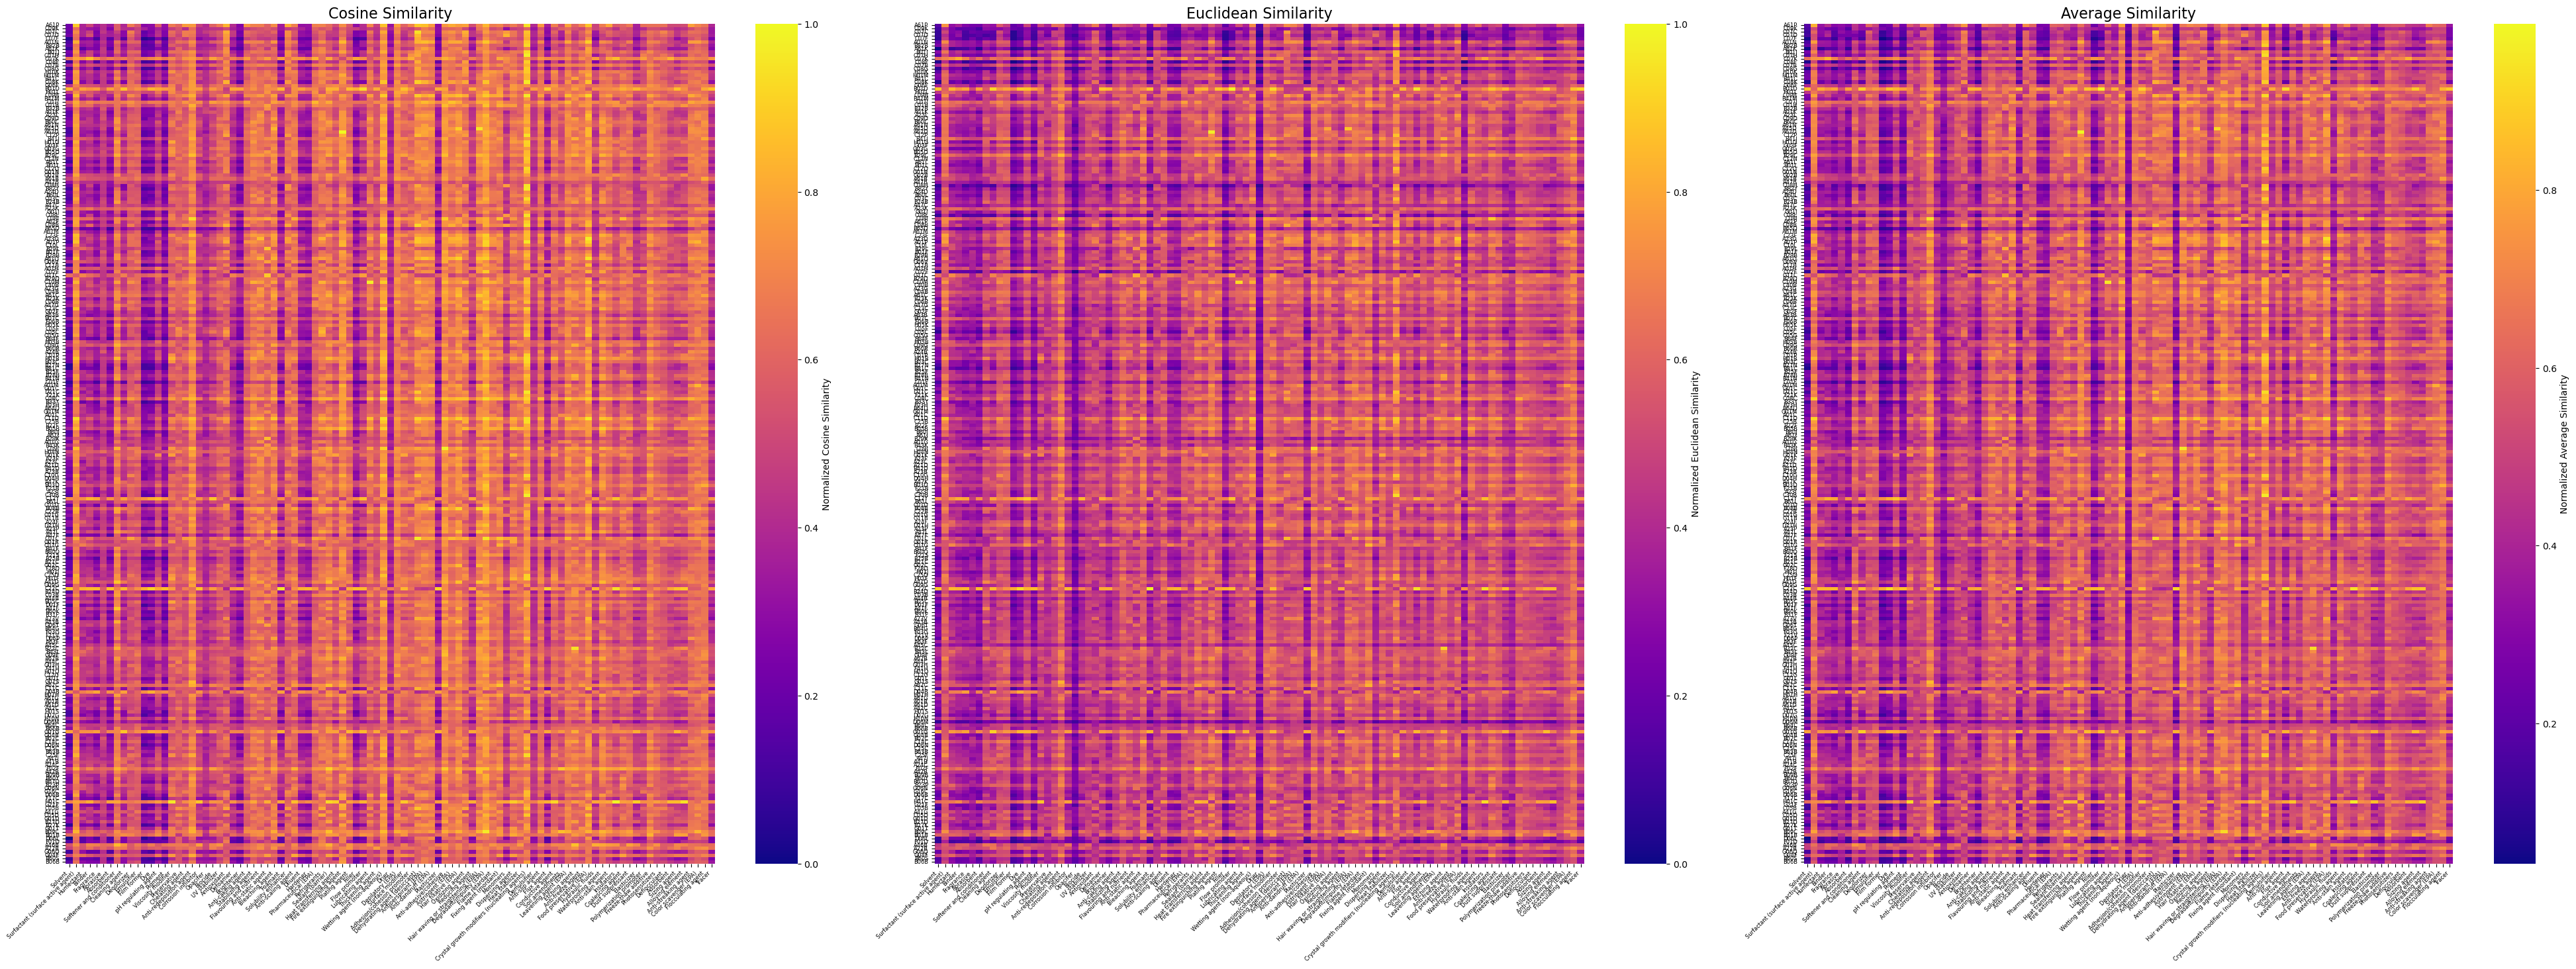


First few function-CPC mappings:
                                  Functional_Use Most_Similar_CPC  \
40                      Fire extinguishing agent             A62D   
43                                 Flow promoter             B01D   
31                                       Foamant             C22C   
80                                    Insulators             H01C   
67  Crystal growth modifiers (nucleating agents)             C30B   

    Similarity_Score CPC_Description  
40          0.987199             N/A  
43          0.973498             N/A  
31          0.971062             N/A  
80          0.961041             N/A  
67          0.956630             N/A  

Summary Statistics for Similarity Scores:
count    95.000000
mean      0.839693
std       0.078696
min       0.520883
25%       0.803557
50%       0.847231
75%       0.884768
max       0.987199
Name: Similarity_Score, dtype: float64


In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_similarity_heatmaps(cpc_embeddings, func_embeddings, cpc_df, func_labels):
   # Calculate different similarity metrics
   cosine_sim = cosine_similarity(cpc_embeddings, func_embeddings)
   euclidean_sim = -euclidean_distances(cpc_embeddings, func_embeddings)
   
   # Normalize matrices to [0,1] range
   def normalize_matrix(matrix):
       return (matrix - matrix.min()) / (matrix.max() - matrix.min())
   
   normalized_cosine = normalize_matrix(cosine_sim) 
   normalized_euclidean = normalize_matrix(euclidean_sim)
   
   # Calculate average
   average_similarity = (normalized_cosine + normalized_euclidean) / 2
   
   # Create subplot with larger figure size
   fig, axes = plt.subplots(1, 3, figsize=(40, 15))
   
   # Plot each heatmap
   metrics = {
       'Cosine Similarity': normalized_cosine,
       'Euclidean Similarity': normalized_euclidean,
       'Average Similarity': average_similarity
   }
   
   for idx, (metric_name, similarity_matrix) in enumerate(metrics.items()):
       sns.heatmap(similarity_matrix, 
                   xticklabels=func_labels,
                   yticklabels=cpc_df['code'],
                   cmap='plasma',
                   cbar_kws={'label': f'Normalized {metric_name}'},
                   ax=axes[idx])
       
       axes[idx].set_title(metric_name, fontsize=16)
       # Smaller font size for labels
       axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right', fontsize=6)
       axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation=0, fontsize=6)
       
       # Add more space for labels
       axes[idx].figure.subplots_adjust(bottom=0.2)
   
   plt.tight_layout(pad=2.0)  # Increase padding
   return average_similarity

# Load and prepare data
cpc_df = pd.read_pickle('CPCEmbeddings.pkl')
func_data = np.load('FunctionEmbeddings.npz')

cpc_embeddings = np.stack(cpc_df['embedding'].values)
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Create heatmaps and get average similarity matrix
average_similarity = create_similarity_heatmaps(cpc_embeddings, func_embeddings, cpc_df, func_labels)
plt.show()

# Create mapping DataFrame
mappings = []
for i, func in enumerate(func_labels):
   # Get the most similar CPC code for this function
   most_similar_idx = np.argmax(average_similarity[:, i])
   similarity_score = average_similarity[most_similar_idx, i]
   
   mapping = {
       'Functional_Use': func,
       'Most_Similar_CPC': cpc_df['code'].iloc[most_similar_idx],
       'Similarity_Score': similarity_score,
       'CPC_Description': cpc_df['text'].iloc[most_similar_idx] if 'text' in cpc_df.columns else 'N/A'
   }
   mappings.append(mapping)

# Create final DataFrame
result_df = pd.DataFrame(mappings)

# Sort by similarity score
result_df = result_df.sort_values('Similarity_Score', ascending=False)

# Save to CSV
result_df.to_csv('functional_cpc_mappings.csv', index=False)

# Display first few rows
print("\nFirst few function-CPC mappings:")
print(result_df.head())

# Display some summary statistics
print("\nSummary Statistics for Similarity Scores:")
print(result_df['Similarity_Score'].describe())

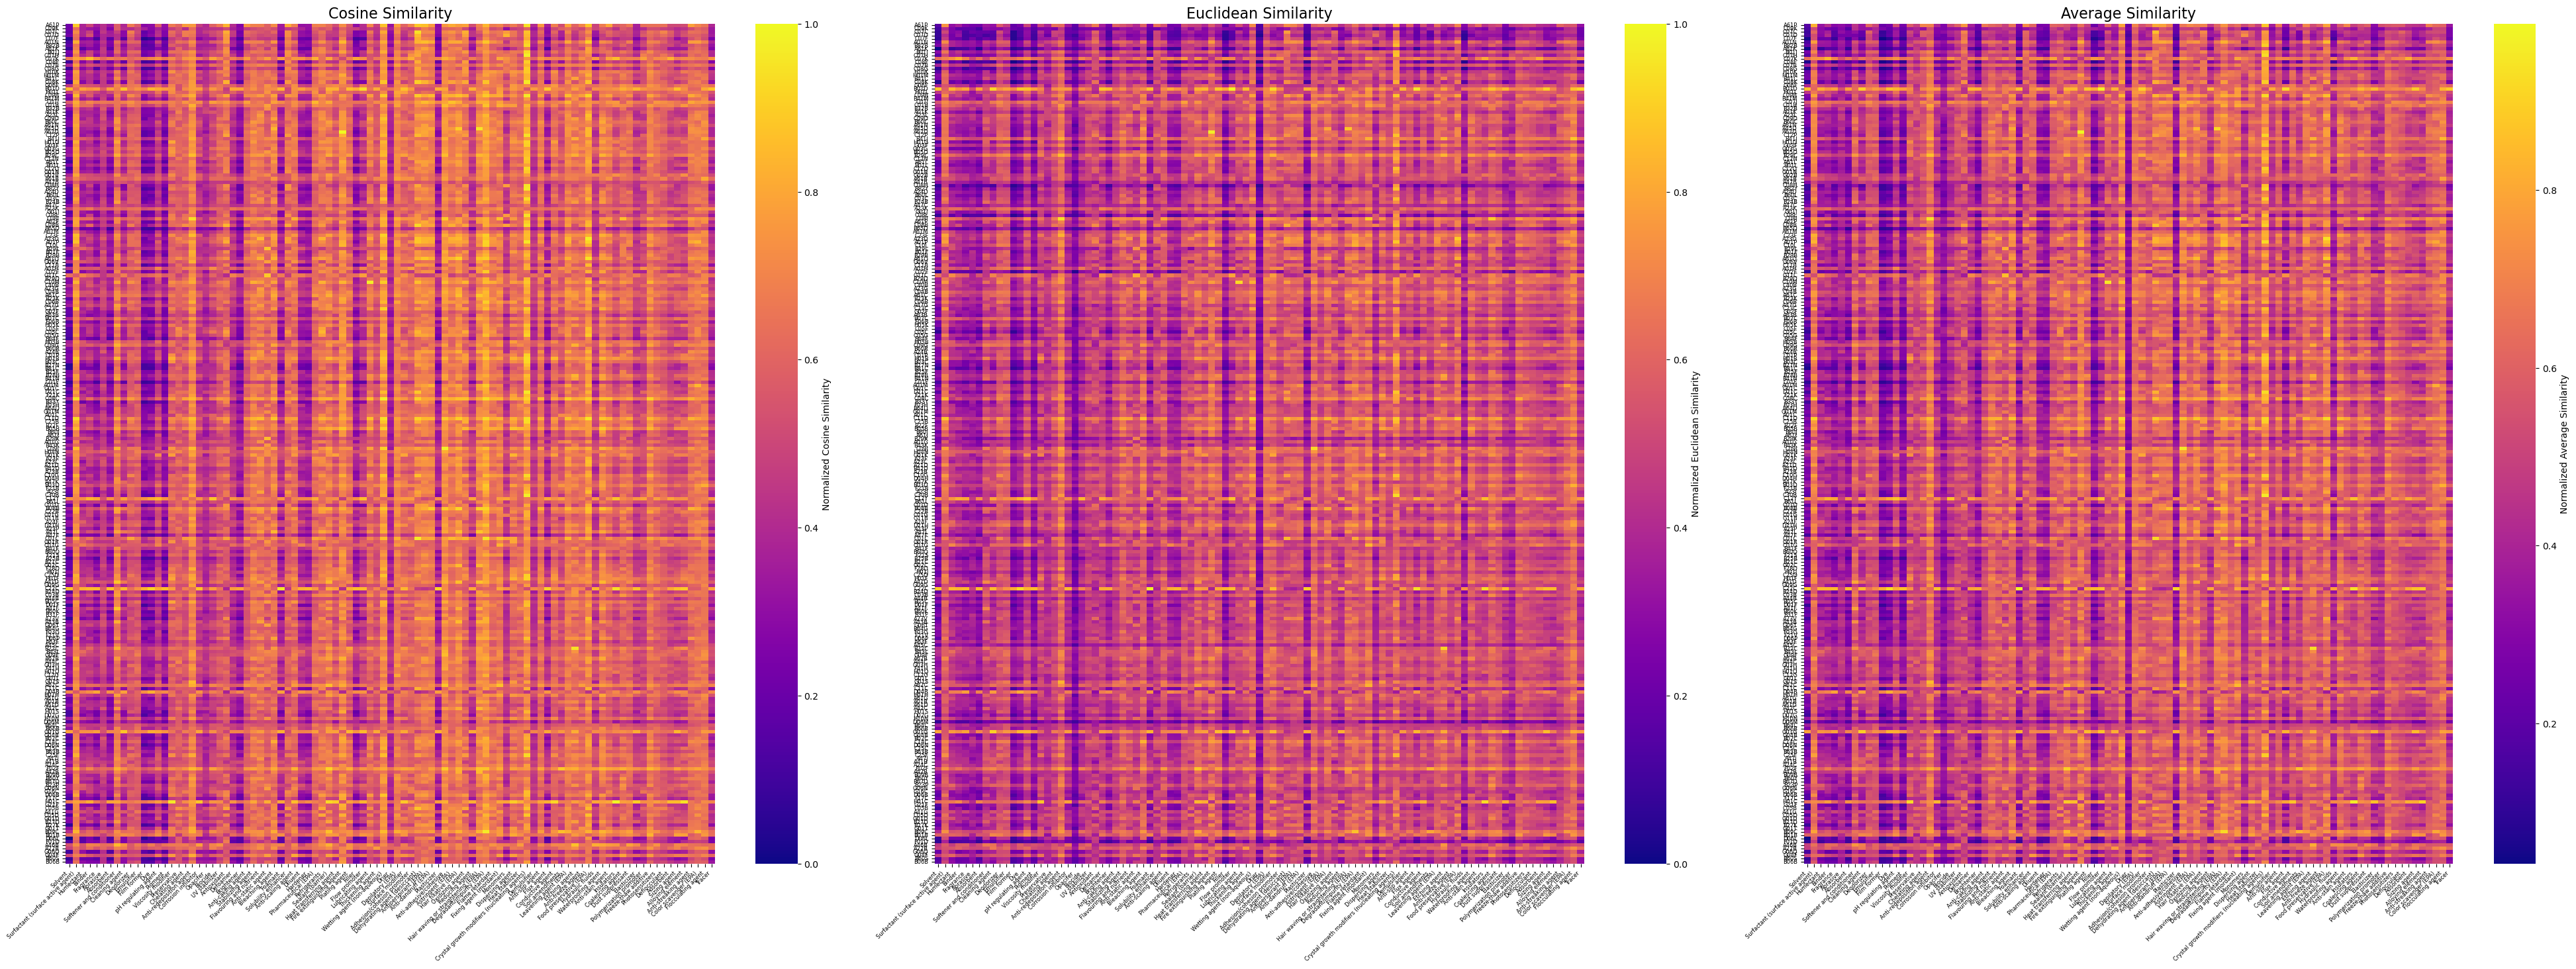


First few function-CPC mappings:
                                     Functional_Use Most_Similar_CPC  \
4981                       Fire extinguishing agent             A62D   
5421                                  Flow promoter             B01D   
3656                                        Foamant             C22C   
12427                                    Insulators             H01C   
10119  Crystal growth modifiers (nucleating agents)             C30B   

       Similarity_Score CPC_Description  
4981           0.987199             N/A  
5421           0.973498             N/A  
3656           0.971062             N/A  
12427          0.961041             N/A  
10119          0.956630             N/A  

Summary Statistics for Similarity Scores:
count    14775.000000
mean         0.618708
std          0.078483
min          0.500014
25%          0.556826
50%          0.607933
75%          0.667300
max          0.987199
Name: Similarity_Score, dtype: float64

CPC Coverage: 252/252 

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def create_similarity_heatmaps(cpc_embeddings, func_embeddings, cpc_df, func_labels):
    # Calculate different similarity metrics
    cosine_sim = cosine_similarity(cpc_embeddings, func_embeddings)
    euclidean_sim = -euclidean_distances(cpc_embeddings, func_embeddings)
    
    # Normalize matrices to [0,1] range
    def normalize_matrix(matrix):
        return (matrix - matrix.min()) / (matrix.max() - matrix.min())
    
    normalized_cosine = normalize_matrix(cosine_sim) 
    normalized_euclidean = normalize_matrix(euclidean_sim)
    
    # Calculate average
    average_similarity = (normalized_cosine + normalized_euclidean) / 2
    
    # Create subplot with larger figure size
    fig, axes = plt.subplots(1, 3, figsize=(40, 15))
    
    # Plot each heatmap
    metrics = {
        'Cosine Similarity': normalized_cosine,
        'Euclidean Similarity': normalized_euclidean,
        'Average Similarity': average_similarity
    }
    
    for idx, (metric_name, similarity_matrix) in enumerate(metrics.items()):
        sns.heatmap(similarity_matrix, 
                    xticklabels=func_labels,
                    yticklabels=cpc_df['code'],
                    cmap='plasma',
                    cbar_kws={'label': f'Normalized {metric_name}'},
                    ax=axes[idx])
        
        axes[idx].set_title(metric_name, fontsize=16)
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right', fontsize=6)
        axes[idx].set_yticklabels(axes[idx].get_yticklabels(), rotation=0, fontsize=6)
        
        axes[idx].figure.subplots_adjust(bottom=0.2)
    
    plt.tight_layout(pad=2.0)
    return average_similarity

def create_comprehensive_mappings(average_similarity, cpc_df, func_labels, similarity_threshold=0.5):
    """
    Creates mappings ensuring every CPC code is mapped to at least one functional use case,
    while allowing multiple CPCs to map to the same functional use.
    """
    mappings = []
    
    # Keep track of which CPC codes have been mapped
    cpc_mapped = set()
    
    # First pass: Map each functional use to its most similar CPC codes
    for func_idx, func in enumerate(func_labels):
        # Get similarities for this functional use
        similarities = average_similarity[:, func_idx]
        
        # Get indices of CPC codes above threshold
        similar_indices = np.where(similarities >= similarity_threshold)[0]
        
        # If no CPCs meet threshold, take the top 3 most similar
        if len(similar_indices) == 0:
            similar_indices = np.argsort(similarities)[-3:]
        
        # Create mappings for each similar CPC
        for idx in similar_indices:
            mapping = {
                'Functional_Use': func,
                'Most_Similar_CPC': cpc_df['code'].iloc[idx],
                'Similarity_Score': similarities[idx],
                'CPC_Description': cpc_df['text'].iloc[idx] if 'text' in cpc_df.columns else 'N/A'
            }
            mappings.append(mapping)
            cpc_mapped.add(cpc_df['code'].iloc[idx])
    
    # Second pass: Handle unmapped CPC codes
    for idx, cpc_code in enumerate(cpc_df['code']):
        if cpc_code not in cpc_mapped:
            # Find the most similar functional use for this CPC
            similarities = average_similarity[idx, :]
            most_similar_func_idx = np.argmax(similarities)
            
            mapping = {
                'Functional_Use': func_labels[most_similar_func_idx],
                'Most_Similar_CPC': cpc_code,
                'Similarity_Score': similarities[most_similar_func_idx],
                'CPC_Description': cpc_df['text'].iloc[idx] if 'text' in cpc_df.columns else 'N/A'
            }
            mappings.append(mapping)
    
    return pd.DataFrame(mappings)

# Load and prepare data
cpc_df = pd.read_pickle('CPCEmbeddings.pkl')
func_data = np.load('FunctionEmbeddings.npz')

cpc_embeddings = np.stack(cpc_df['embedding'].values)
func_embeddings = func_data['embeddings']
func_labels = func_data['labels']

# Create heatmaps and get average similarity matrix
average_similarity = create_similarity_heatmaps(cpc_embeddings, func_embeddings, cpc_df, func_labels)
plt.show()

# Create comprehensive mappings
result_df = create_comprehensive_mappings(average_similarity, cpc_df, func_labels)

# Sort by similarity score
result_df = result_df.sort_values('Similarity_Score', ascending=False)

# Save to CSV
result_df.to_csv('functional_cpc_mappings.csv', index=False)

# Display first few rows
print("\nFirst few function-CPC mappings:")
print(result_df.head())

# Display some summary statistics
print("\nSummary Statistics for Similarity Scores:")
print(result_df['Similarity_Score'].describe())

# Verify coverage
total_cpc_codes = len(cpc_df)
mapped_cpc_codes = len(result_df['Most_Similar_CPC'].unique())
print(f"\nCPC Coverage: {mapped_cpc_codes}/{total_cpc_codes} ({mapped_cpc_codes/total_cpc_codes*100:.2f}%)")

# Display distribution of mappings per functional use
func_mapping_counts = result_df['Functional_Use'].value_counts()
print("\nNumber of CPC codes mapped to each functional use:")
print(func_mapping_counts)

In [2]:
result_df

Functional_Use Most_Similar_CPC  \
4981                       Fire extinguishing agent             A62D   
5421                                  Flow promoter             B01D   
3656                                        Foamant             C22C   
12427                                    Insulators             H01C   
10119  Crystal growth modifiers (nucleating agents)             C30B   
...                                             ...              ...   
9493                                       Monomers             C08K   
3775                            Solubility enhancer             A01G   
7260                           Antiperspirant (EPA)             B01B   
1676                                Chelating agent             B25F   
12249                              Anti-stain agent             A23V   

       Similarity_Score CPC_Description  
4981           0.987199             N/A  
5421           0.973498             N/A  
3656           0.971062             N/A  
12427          0.961041             N/A  
10119          0.956630             N/A  
...                 ...             ...  
9493           0.500086             N/A  
3775           0.500085             N/A  
7260           0.500085             N/A  
1676           0.500063             N/A  
12249          0.500014             N/A  

[14775 rows x 4 columns]